# Ingest and Plot OOI Profiler Data

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from ormhw.ooi import GoldCopy
from ormhw.transitions import CBR

## Get Wind Data

In [2]:
%%time
met = GoldCopy('CE04OSSM', 'SBD','METBK','metbk',datetime(2019,6,20), datetime(2019,10,15)).data(resample = '1D')
met = met[(met.index >= datetime(2019,6,20)) & (met.index <= datetime(2019,10,15))]
met = met.rolling('8D').mean()

CPU times: user 2.92 s, sys: 490 ms, total: 3.41 s
Wall time: 3.81 s


## Get MHW Data

In [3]:
mhwdf4 =  pd.read_csv('/home/jovyan/oregon-shelf-mhw/data/mhws/mhws_ce04.csv',index_col = 0)
mhwdf2 =  pd.read_csv('/home/jovyan/oregon-shelf-mhw/data/mhws/mhws_ce02.csv',index_col = 0)
mhwdf1 =  pd.read_csv('/home/jovyan/oregon-shelf-mhw/data/mhws/mhws_ce01.csv',index_col = 0)

## Get CHL Data

In [4]:
%%time
sp1chl = GoldCopy('CE01ISSP','SP','FLORT','flort',datetime(2019,6,20), datetime(2019,10,15)).data()
sp2chl = GoldCopy('CE02SHSP','SP','FLORT','flort',datetime(2019,6,20), datetime(2019,10,15)).data()
sp4chl = GoldCopy('CE04OSPS','SF','FLORT','flort',datetime(2019,6,20), datetime(2019,10,15)).data(resample = '5S')

sp1chl = sp1chl[sp1chl.depth <= 20]
sp2chl = sp2chl[sp2chl.depth <= 50]
sp4chl = sp4chl[sp4chl.depth <= 100]

sp1chl = sp1chl[(sp1chl.index >= datetime(2019,6,20)) & (sp1chl.index <= datetime(2019,10,15))]
sp2chl = sp2chl[(sp2chl.index >= datetime(2019,6,20)) & (sp2chl.index <= datetime(2019,10,15))]
sp4chl = sp4chl[(sp4chl.index >= datetime(2019,6,20)) & (sp4chl.index <= datetime(2019,10,15))]

CPU times: user 18.2 s, sys: 7.4 s, total: 25.6 s
Wall time: 28.3 s


## Get CTD Data

In [5]:
%%time
sp1ctd = GoldCopy('CE01ISSP','SP','CTD','ctd',datetime(2019,6,20), datetime(2019,10,15)).data()
sp2ctd = GoldCopy('CE02SHSP','SP','CTD','ctd',datetime(2019,6,20), datetime(2019,10,15)).data()
sp4ctd = GoldCopy('CE04OSPS','SF','CTD','ctd',datetime(2019,6,20), datetime(2019,10,15)).data(resample = '5S')

sp1ctd = sp1ctd[sp1ctd.depth <= 20]
sp2ctd = sp2ctd[sp2ctd.depth <= 50]
sp4ctd = sp4ctd[sp4ctd.depth <= 100]

sp1ctd = sp1ctd[(sp1ctd.index >= datetime(2019,6,20)) & (sp1ctd.index <= datetime(2019,10,15))]
sp2ctd = sp2ctd[(sp2ctd.index >= datetime(2019,6,20)) & (sp2ctd.index <= datetime(2019,10,15))]
sp4ctd = sp4ctd[(sp4ctd.index >= datetime(2019,6,20)) & (sp4ctd.index <= datetime(2019,10,15))]

CPU times: user 1min 7s, sys: 12.7 s, total: 1min 20s
Wall time: 1min 52s


# Setup CHL Colormap

In [6]:
cmap = plt.cm.jet 
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (0, 0, 0, 1.0)
cmapchl = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 10, 11)
normchl = mpl.colors.BoundaryNorm(bounds, cmapchl.N)

In [7]:
figure_directory = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures"
os.makedirs(figure_directory, exist_ok = True)
figure_save_filepath = f"{os.path.expanduser('~')}/oregon-shelf-mhw/figures/ooi_profiler_2019.png"

## Plot Profiler Data

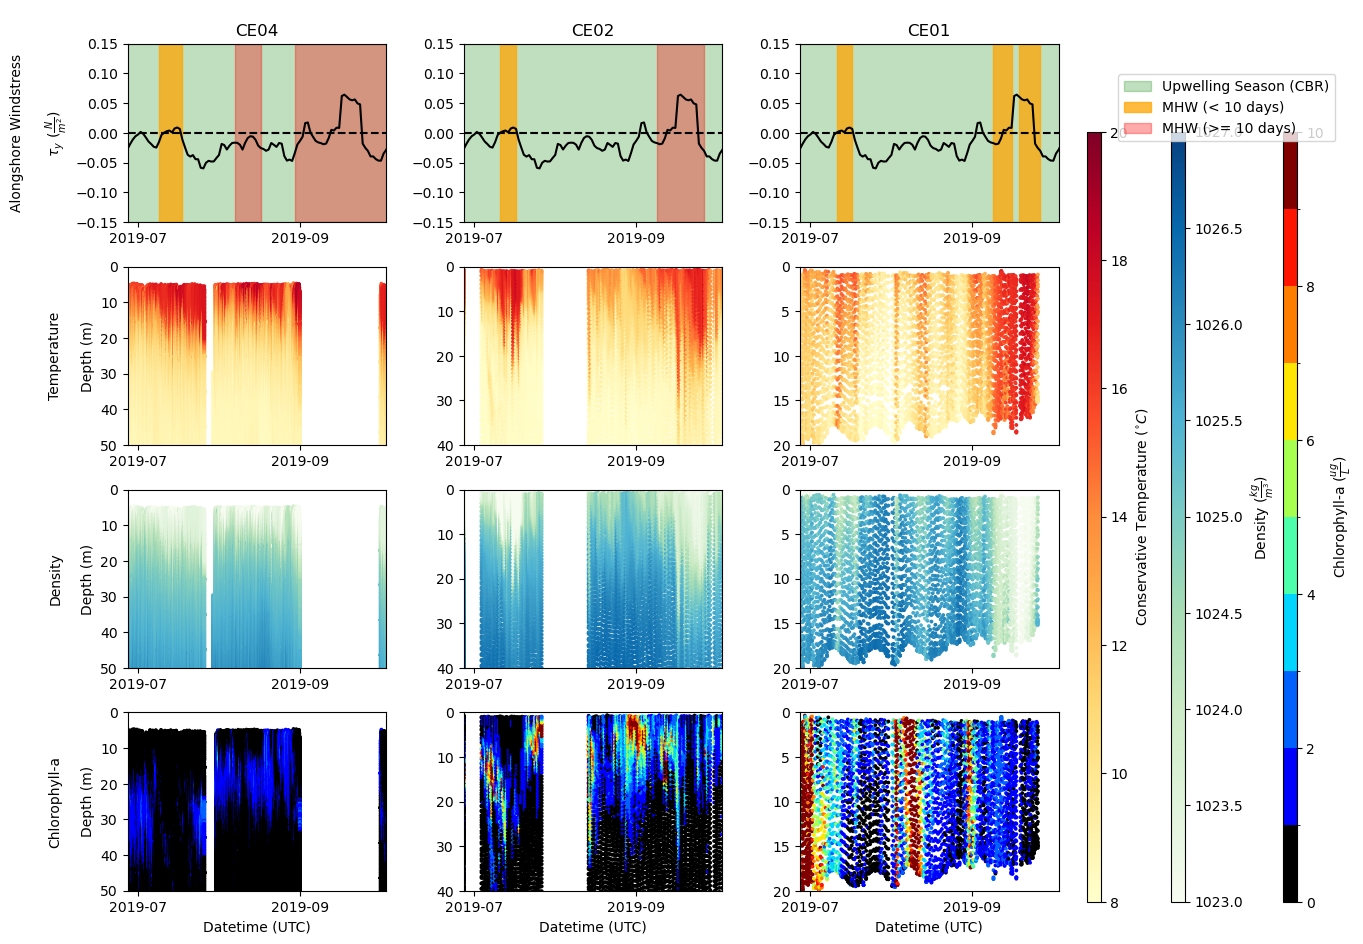

In [8]:
fig = plt.figure(figsize = (14,11))
grid = (4,3)
ax1 = plt.subplot2grid(grid, (0,0), colspan = 1,rowspan = 1)
ax2 = plt.subplot2grid(grid, (0,1), colspan = 1,rowspan = 1)
ax3 = plt.subplot2grid(grid, (0,2), colspan = 1,rowspan = 1)

ax4 = plt.subplot2grid(grid, (1,0), colspan = 1,rowspan = 1)
ax5 = plt.subplot2grid(grid, (1,1), colspan = 1,rowspan = 1)
ax6 = plt.subplot2grid(grid, (1,2), colspan = 1,rowspan = 1)

ax7 = plt.subplot2grid(grid, (2,0), colspan = 1,rowspan = 1)
ax8 = plt.subplot2grid(grid, (2,1), colspan = 1,rowspan = 1)
ax9 = plt.subplot2grid(grid, (2,2), colspan = 1,rowspan = 1)

ax10 = plt.subplot2grid(grid, (3,0), colspan = 1,rowspan = 1)
ax11 = plt.subplot2grid(grid, (3,1), colspan = 1,rowspan = 1)
ax12 = plt.subplot2grid(grid, (3,2), colspan = 1,rowspan = 1)

all_axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12]
windaxs = [ax1,ax2, ax3]
axs4 = [ax4,ax7,ax10]
axs2 = [ax5, ax8, ax11]
axs1 = [ax6, ax9, ax12]


ax1.plot(met.index, met.tau_y, color = 'black')
ax1.axhline(0, color = 'black', linestyle = '--')
ax2.plot(met.index, met.tau_y, color = 'black')
ax2.axhline(0, color = 'black', linestyle = '--')
ax3.plot(met.index, met.tau_y, color = 'black')
ax3.axhline(0, color = 'black', linestyle = '--')


p1 = ax4.scatter(sp4ctd.index, sp4ctd.depth, c = sp4ctd.CT, cmap = 'YlOrRd', vmin = 8, vmax = 20, s= 3)
ax5.scatter(sp2ctd.index, sp2ctd.depth, c = sp2ctd.CT, cmap = 'YlOrRd', vmin = 8, vmax = 20, s= 3)
ax6.scatter(sp1ctd.index, sp1ctd.depth, c = sp1ctd.CT, cmap = 'YlOrRd', vmin = 8, vmax = 20, s= 3)

p2 = ax7.scatter(sp4ctd.index, sp4ctd.depth, c = sp4ctd.rho, cmap = 'GnBu', vmin = 1023, vmax = 1027, s= 3)
ax8.scatter(sp2ctd.index, sp2ctd.depth, c = sp2ctd.rho, cmap = 'GnBu', vmin = 1023, vmax = 1027, s= 3)
ax9.scatter(sp1ctd.index, sp1ctd.depth, c = sp1ctd.rho, cmap = 'GnBu', vmin = 1023, vmax = 1027, s= 3)

p3 = ax10.scatter(sp4chl.index, sp4chl.depth, c = sp4chl.fchla, cmap = cmapchl, norm = normchl, s= 3)
ax11.scatter(sp2chl.index, sp2chl.depth, c = sp2chl.fchla, cmap = cmapchl, norm = normchl, s= 3)
ax12.scatter(sp1chl.index, sp1chl.depth, c = sp1chl.fchla, cmap = cmapchl, norm = normchl, s= 3)

            
for _ax in all_axs:
    _ax.set_xlim(datetime(2019,6,27), datetime(2019,10,4))
    _ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 2))
for _ax in axs4:
    _ax.set_ylim(0,50)
    _ax.invert_yaxis()
    # _ax.set_ylabel('Depth (m)')
for _ax in axs2:
    _ax.set_ylim(0,40)
    _ax.invert_yaxis()
for _ax in axs1:
    _ax.set_ylim(0,20)
    _ax.invert_yaxis()

    
for _ax in [ax1]:
    _ax.set_ylim(-0.15,0.15)
    SF = CBR[2019]
    _ax.axvspan(datetime.strptime(f'{2019}-{SF["spring"]}', '%Y-%j'),datetime.strptime(f'{2019}-{SF["fall"]}', '%Y-%j'), color = 'green',zorder = 0,alpha = 0.25, label = 'Upwelling Season (CBR)')
    
    _mhwdf = mhwdf4[mhwdf4.year == 2019]
    for idx, row in _mhwdf.iterrows():
        jds = datetime.strptime(f'{2019}-{int(row.Ts)}', '%Y-%j')
        jde = datetime.strptime(f'{2019}-{int(row.Te)}', '%Y-%j')
        if row.D >= 10:
            _ax.axvspan(jds,jde,color = 'red',zorder = 1,alpha = 0.33, label = 'MHW (>= 10 days)')
        else:
            _ax.axvspan(jds,jde,color = 'orange',zorder = 1,alpha = 0.75, label = 'MHW (< 10 days)')

    
for _ax in [ax2]:
    _ax.set_ylim(-0.15,0.15)
    SF = CBR[2019]
    _ax.axvspan(datetime.strptime(f'{2019}-{SF["spring"]}', '%Y-%j'),datetime.strptime(f'{2019}-{SF["fall"]}', '%Y-%j'), color = 'green',zorder = 0,alpha = 0.25, label = 'Upwelling Season (CBR)')
    
    _mhwdf = mhwdf2[mhwdf2.year == 2019]
    for idx, row in _mhwdf.iterrows():
        jds = datetime.strptime(f'{2019}-{int(row.Ts)}', '%Y-%j')
        jde = datetime.strptime(f'{2019}-{int(row.Te)}', '%Y-%j')
        if row.D >= 10:
            _ax.axvspan(jds,jde,color = 'red',zorder = 1,alpha = 0.33, label = 'MHW (>= 10 days)')
        else:
            _ax.axvspan(jds,jde,color = 'orange',zorder = 1,alpha = 0.75, label = 'MHW (< 10 days)')
    _handles, _labels = ax2.get_legend_handles_labels()
            
for _ax in [ax3]:
    _ax.set_ylim(-0.15,0.15)
    SF = CBR[2019]
    _ax.axvspan(datetime.strptime(f'{2019}-{SF["spring"]}', '%Y-%j'),datetime.strptime(f'{2019}-{SF["fall"]}', '%Y-%j'), color = 'green',zorder = 0,alpha = 0.25, label = 'Upwelling Season (CBR)')
    
    _mhwdf = mhwdf1[mhwdf1.year == 2019]
    for idx, row in _mhwdf.iterrows():
        jds = datetime.strptime(f'{2019}-{int(row.Ts)}', '%Y-%j')
        jde = datetime.strptime(f'{2019}-{int(row.Te)}', '%Y-%j')
        if row.D >= 10:
            _ax.axvspan(jds,jde,color = 'red',zorder = 1,alpha = 0.33, label = 'MHW (>= 10 days)')
        else:
            _ax.axvspan(jds,jde,color = 'orange',zorder = 1,alpha = 0.75, label = 'MHW (< 10 days)')
    
                     
            
ax1.set_title('CE04')
ax2.set_title('CE02')
ax3.set_title('CE01')
ax10.set_xlabel('Datetime (UTC)')
ax11.set_xlabel('Datetime (UTC)')
ax12.set_xlabel('Datetime (UTC)')
ax1.set_ylabel('Alongshore Windstress\n\n' + r"$\tau_y\ (\frac{N}{m^2})$")
ax4.set_ylabel('Temperature\n\n' + "Depth (m)")
ax7.set_ylabel('Density\n\n' + "Depth (m)")
ax10.set_ylabel('Chlorophyll-a\n\n' + "Depth (m)")

fig.subplots_adjust(right=0.79,hspace = 0.25,wspace = 0.3)
cbar_ax1 = fig.add_axes([0.81, 0.1, 0.01, 0.7])
fig.colorbar(p1, cax=cbar_ax1,label = r'Conservative Temperature ($^{\circ}C$)')

cbar_ax2 = fig.add_axes([0.87, 0.1, 0.01, 0.7])
fig.colorbar(p2, cax=cbar_ax2,label = r'Density ($\frac{kg}{m^3}$)')

cbar_ax3 = fig.add_axes([0.95, 0.1, 0.01, 0.7])
fig.colorbar(p3, cax=cbar_ax3,label = r'Chlorophyll-a ($\frac{ug}{L}$)')

fig.legend(_handles[:2] + [_handles[-1]], _labels[:2] + [_labels[-1]],ncol = 1, loc = (0.82,0.85))
plt.savefig(figure_save_filepath,dpi = 1200)